In [88]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn
import numpy as np


df = pd.read_csv("dataset.csv",encoding="big5")

df.columns = ['Serial No.','GRE Score','TOEFL Score','University Rating','SOP','LOR ','CGPA','Research','Chance of Admit ']


X = df[['Serial No.','GRE Score','TOEFL Score','University Rating','SOP','LOR ','CGPA','Research']].round()
y = df['Chance of Admit '].round()

In [89]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

Accuracy:  0.9


C:\Users\snow0\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


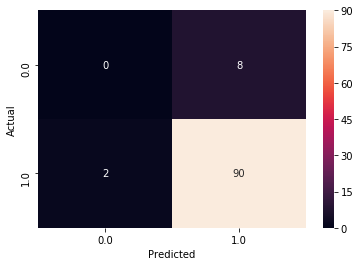

In [90]:
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))

In [103]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline

# Version
print(mpl.__version__)  #> 3.0.0
print(sns.__version__)  #> 0.9.0

3.0.3
0.9.0


C:\Users\snow0\Anaconda3\lib\site-packages\IPython\utils\_process_win32.py:131: ResourceWarning: unclosed file <_io.BufferedWriter name=8>
  return process_handler(cmd, _system_body)
C:\Users\snow0\Anaconda3\lib\site-packages\IPython\utils\_process_win32.py:131: ResourceWarning: unclosed file <_io.BufferedReader name=9>
  return process_handler(cmd, _system_body)
C:\Users\snow0\Anaconda3\lib\site-packages\IPython\utils\_process_win32.py:131: ResourceWarning: unclosed file <_io.BufferedReader name=10>
  return process_handler(cmd, _system_body)


<Figure size 432x288 with 0 Axes>

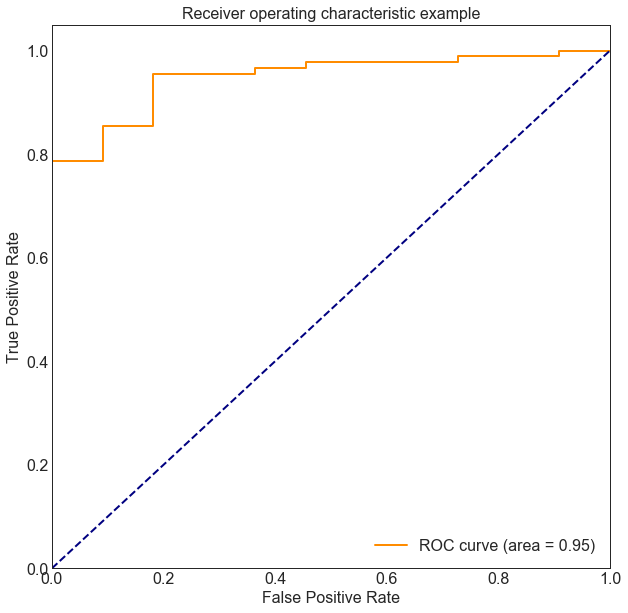

In [108]:
%clear
%reset -f
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc  ###計算roc和auc
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

 # In[*]
# Import some data to play with
import pandas as pd
df = pd.read_csv("dataset.csv",encoding="big5")

df.columns = ['Serial No.','GRE Score','TOEFL Score','University Rating','SOP','LOR ','CGPA','Research','Chance of Admit ']


X = df[['Serial No.','GRE Score','TOEFL Score','University Rating','SOP','LOR ','CGPA','Research']].round()
y = df['Chance of Admit '].round()
 
# shuffle and split training and test sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=1)

 # In[*]
# Learn to predict each class against the other
svm = svm.SVC(kernel='linear', probability=True,random_state=0)
 
###通過decision_function()計算得到的y_score的值，用在roc_curve()函數中
y_score = svm.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr,tpr,threshold = roc_curve(y_test, y_score) ###計算真正率和假正率
roc_auc = auc(fpr,tpr) ###計算auc的值
 # In[*]
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) ###假正率爲橫座標，真正率爲縱座標做曲線
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()